In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Ok Let's bring in our csv file / Data
df=pd.read_csv('airline_name_hidden.csv')

In [4]:
df.shape

(129880, 22)

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [11]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.duplicated().sum()

0

In [12]:
df_cat = df.select_dtypes('object').columns.to_list()
pd.DataFrame(
    {col: [list(df[col].unique())] 
     for col in df_cat},
    index=['Categories']
).T

,Categories
satisfaction,"[satisfied, dissatisfied]"
Customer Type,"[Loyal Customer, disloyal Customer]"
Type of Travel,"[Personal Travel, Business travel]"
Class,"[Eco, Business, Eco Plus]"


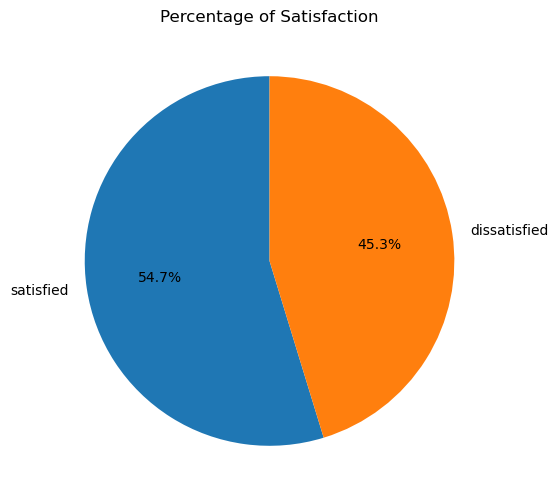

In [13]:
plt.figure(figsize=(8, 6))
plt.pie(df['satisfaction'].value_counts(),
        labels = df['satisfaction'].unique(),
        autopct = '%1.1f%%',
        startangle = 90
       )
plt.title('Percentage of Satisfaction')
plt.show()

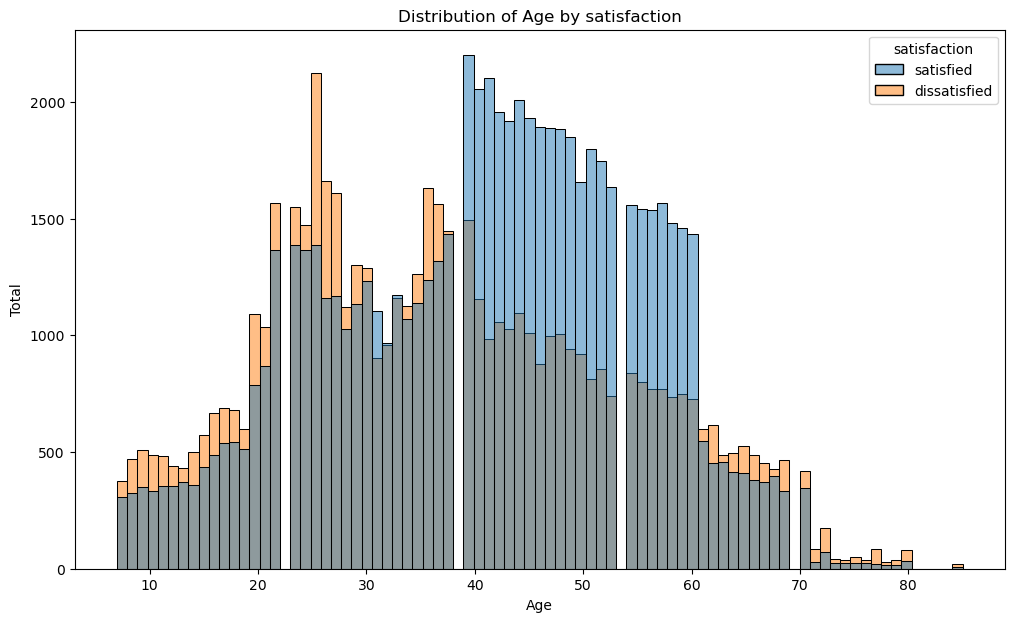

In [14]:
plt.figure(figsize=(12, 7))
sns.histplot(data = df,
            x = 'Age',
            hue = 'satisfaction'
            )      
plt.title('Distribution of Age by satisfaction')
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

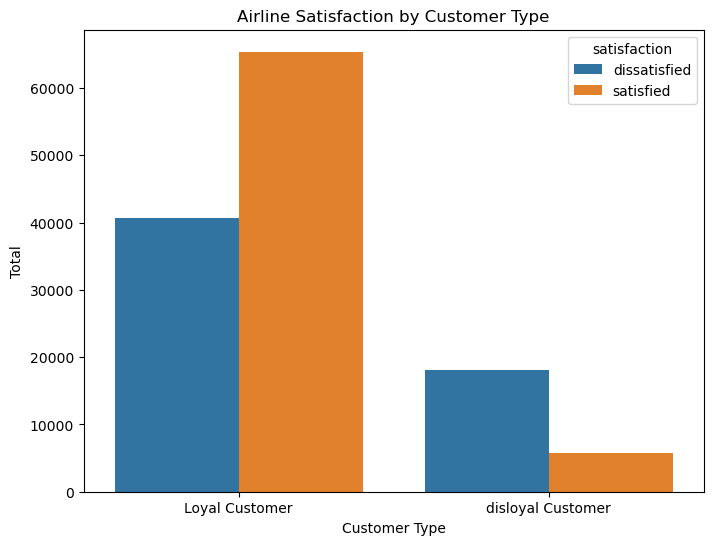

In [15]:
airline_customer = df.groupby('satisfaction')['Customer Type'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Customer Type',
            y = 'count',
            hue = 'satisfaction',
            data = airline_customer)
plt.xlabel('Customer Type')
plt.ylabel('Total')
plt.title('Airline Satisfaction by Customer Type')
plt.show()

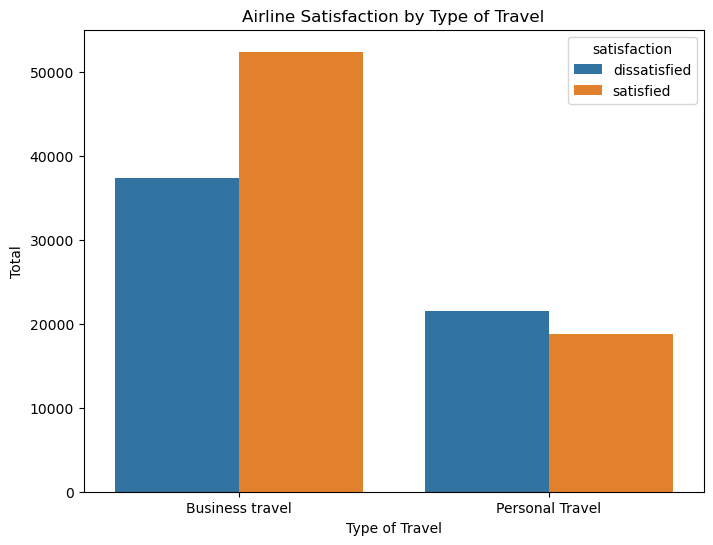

In [16]:
airline_travel = df.groupby('satisfaction')['Type of Travel'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Type of Travel',
            y = 'count',
            hue = 'satisfaction',
            data = airline_travel)
plt.xlabel('Type of Travel')
plt.ylabel('Total')
plt.title('Airline Satisfaction by Type of Travel')
plt.show()

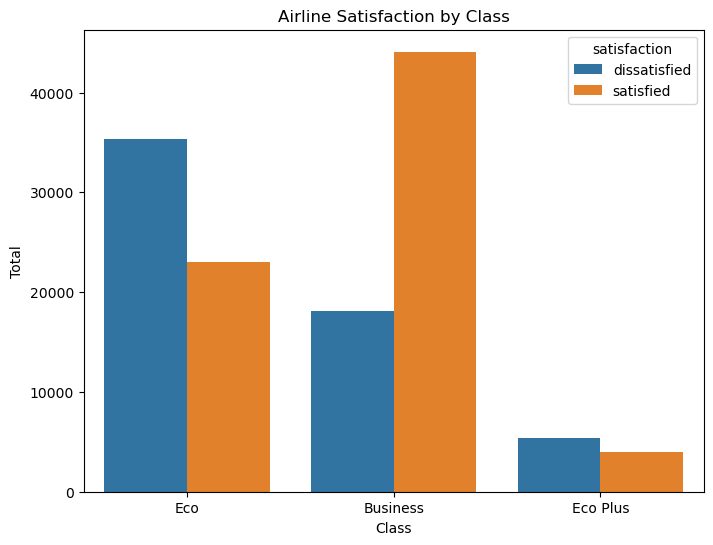

In [17]:
airline_class = df.groupby('satisfaction')['Class'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Class',
            y = 'count',
            hue = 'satisfaction',
            data = airline_class
           )
plt.xlabel('Class')
plt.ylabel('Total')
plt.title('Airline Satisfaction by Class')
plt.show()

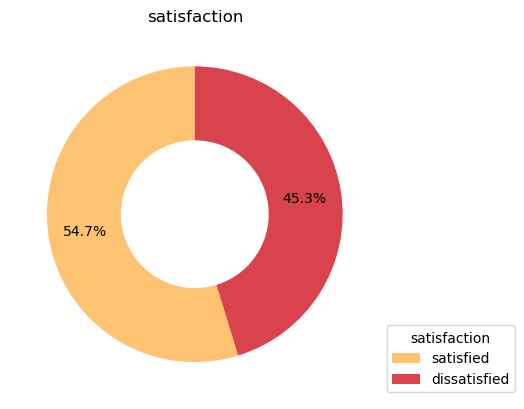

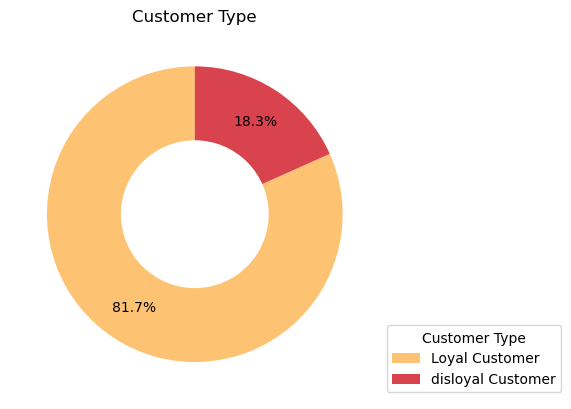

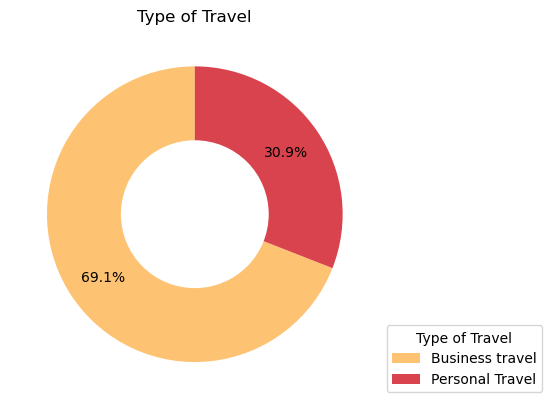

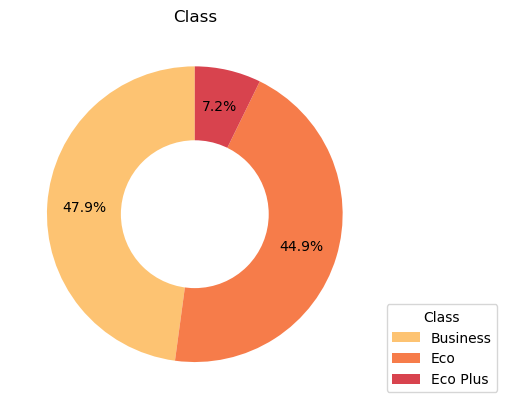

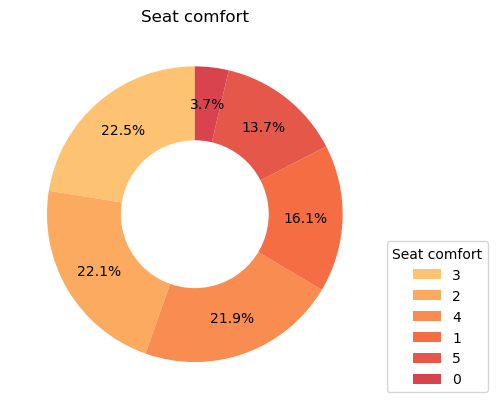

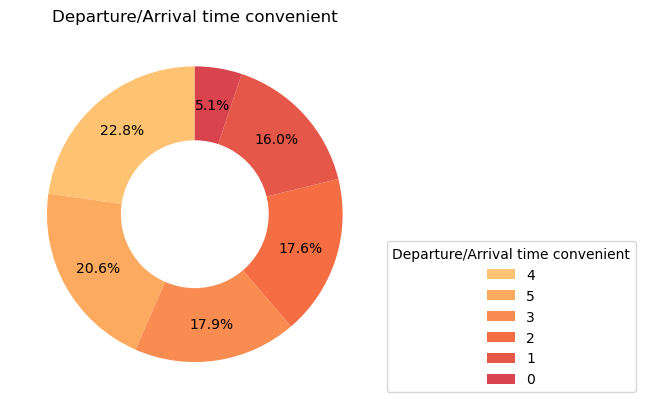

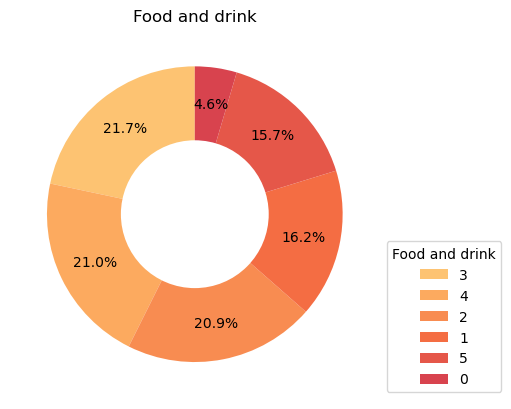

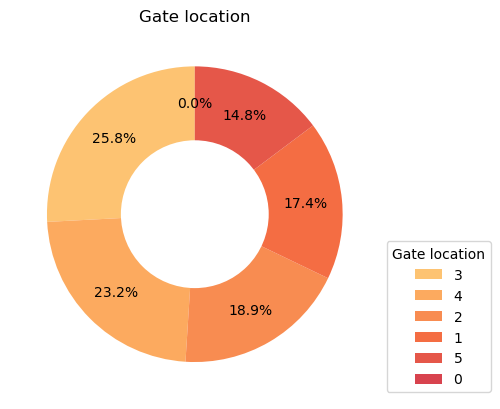

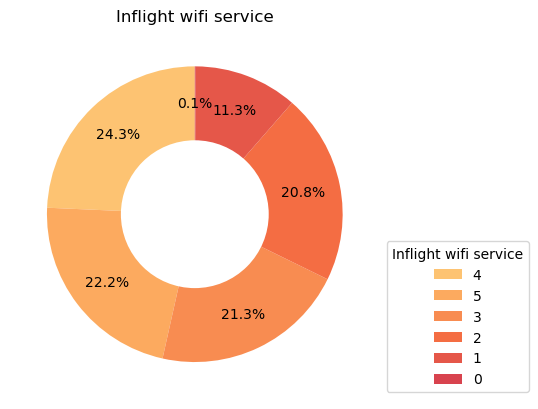

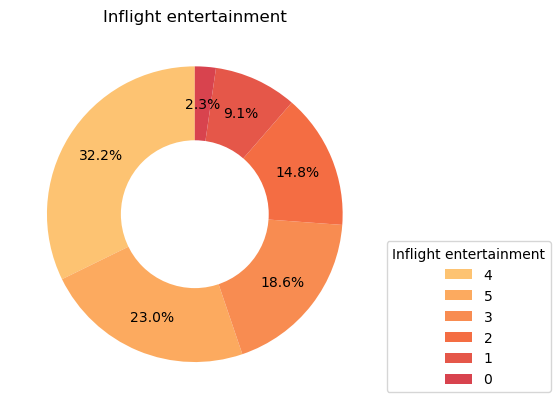

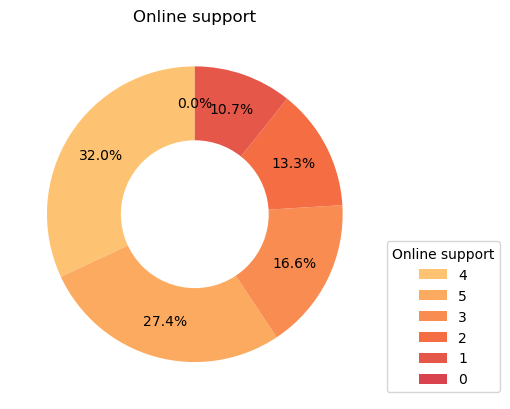

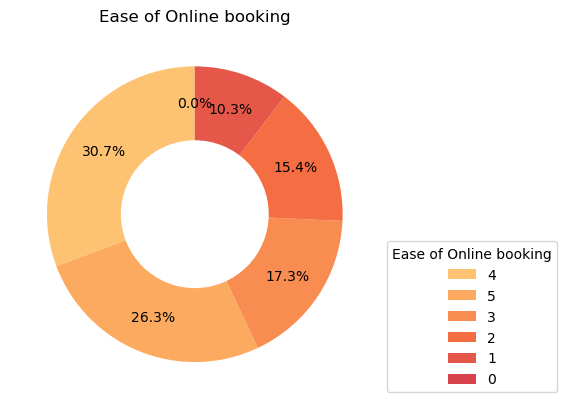

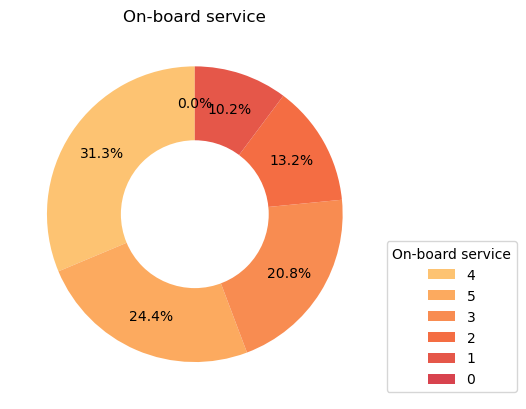

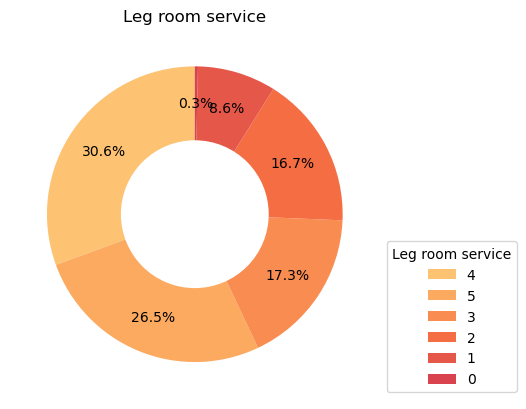

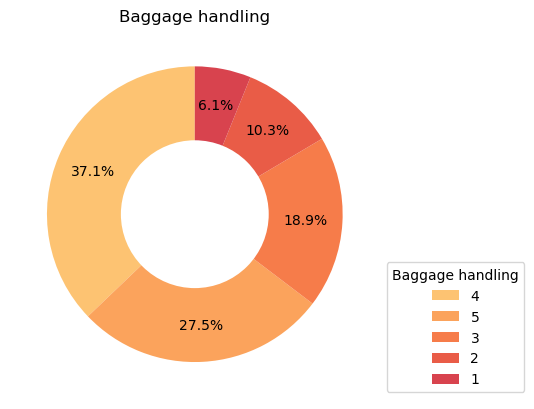

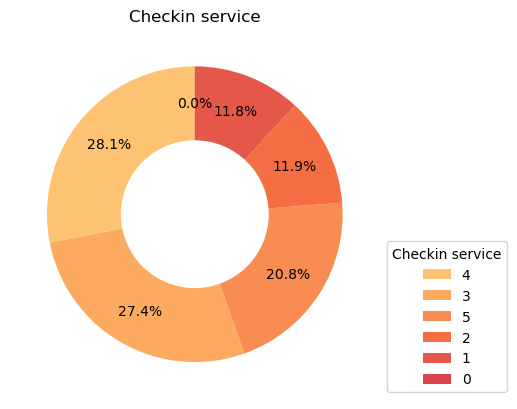

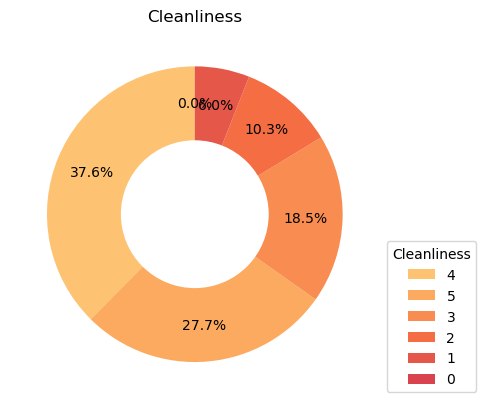

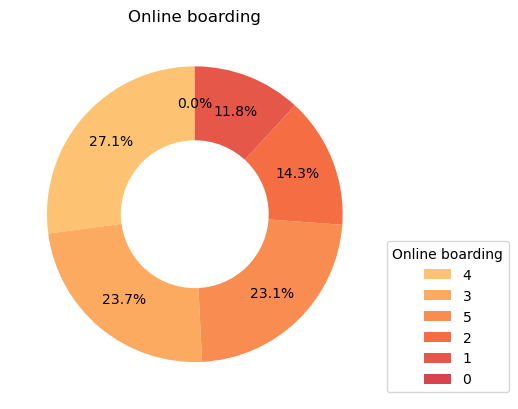

In [19]:
# let's Visualize 
for column in df.columns:
    if df[column].nunique() < 10:
        
        fig, ax = plt.subplots()
        
        counts = df[column].value_counts()
        
        colormap = plt.cm.Spectral
        patches = df[column].nunique()
        colors = [colormap(i) for i in np.linspace(0.34, 0.11, patches)]
    
        
        CenterCircle = plt.Circle((0,0),0.5,fc='white')
        
        pie = plt.pie(counts, startangle=90, autopct='%1.1f%%', pctdistance=0.75, colors=colors)
        fig.gca().add_artist(CenterCircle)
        plt.legend(pie[0], labels=counts.index, title=column, loc='lower left', bbox_to_anchor=[1,0,0,0])
        plt.title(f'{column}')

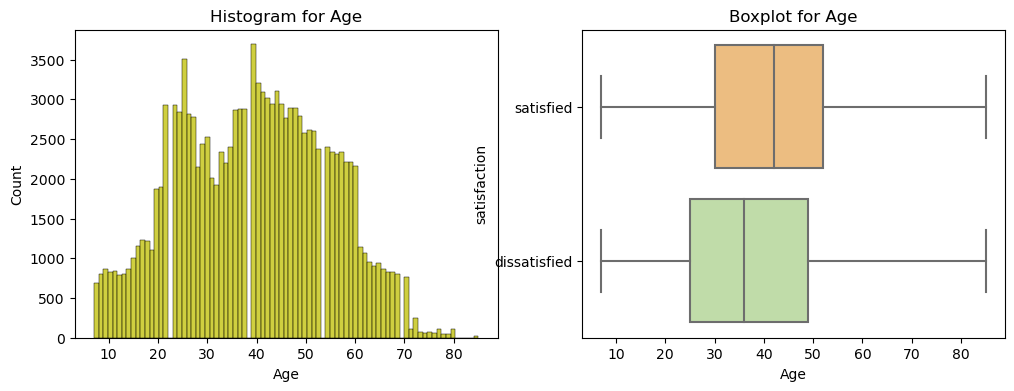

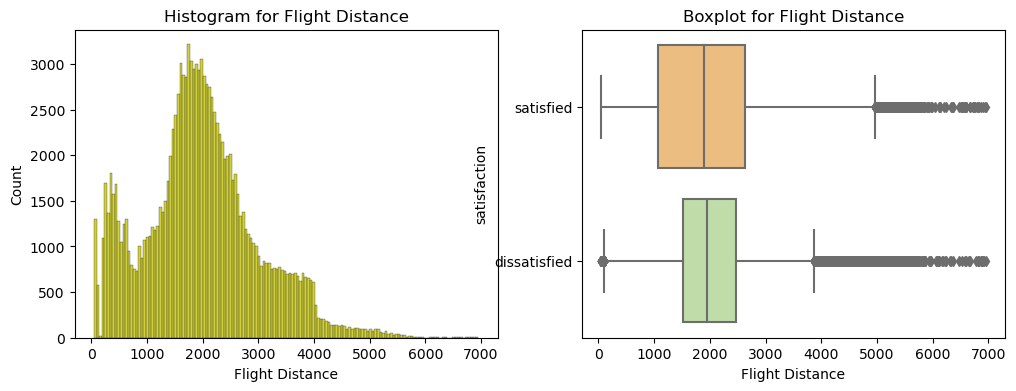

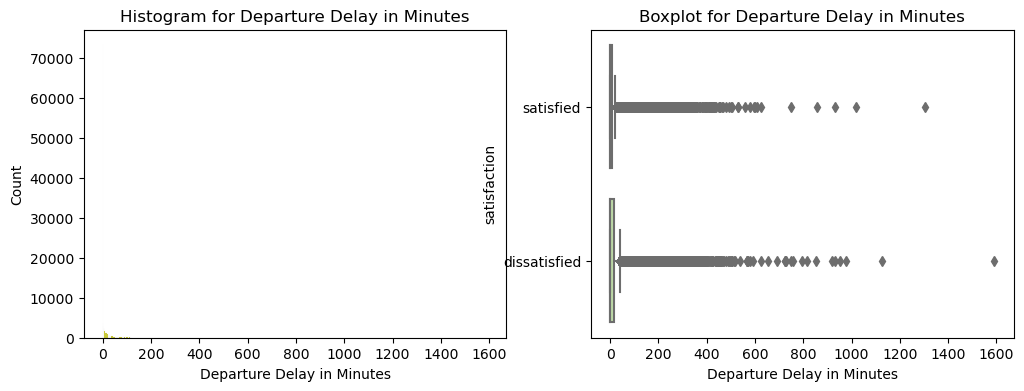

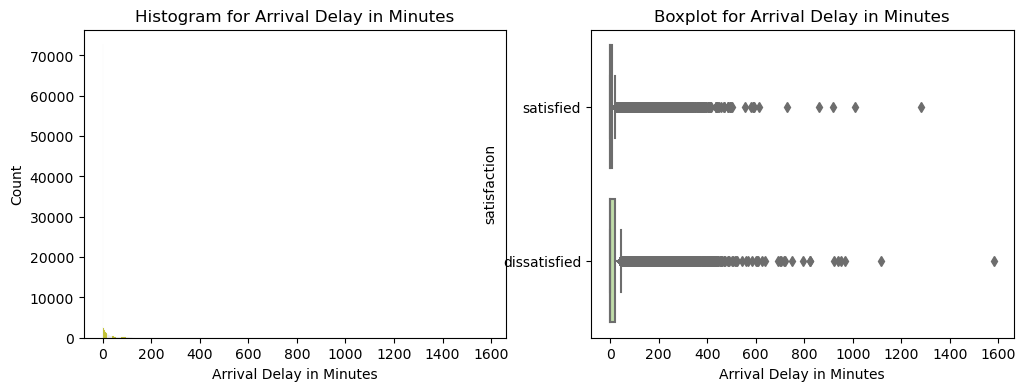

In [20]:
#let's visualize 
for column in df.columns:
    if df[column].nunique() > 10:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        counts = df[column].value_counts()

        sns.histplot(x=column, data=df, color='y', ax=ax[0])
        ax[0].set_title(f'Histogram for {column}')

        sns.boxplot(x=column, y='satisfaction', palette='Spectral', data=df, ax=ax[1])
        ax[1].set_title(f'Boxplot for {column}')

        plt.show()

In [21]:
df.describe(percentiles=[0.75, 0.90, 0.95, 0.98])

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
90%,59.000000,3399.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,44.000000,44.000000
95%,64.000000,3831.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,77.000000,78.000000
98%,68.000000,4316.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,132.000000,134.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [22]:
df['Checkin service'].value_counts()

Checkin service
4    36481
3    35538
5    27005
2    15486
1    15369
0        1
Name: count, dtype: int64

In [23]:
rows_to_drop = []
for column in df.columns:
    if df[column].nunique() < 10:
        value_counts = df[column].value_counts(normalize=True)*100
        low_variance_categories = (value_counts / df[column].nunique() * 100) < 1
        if low_variance_categories.any():
            print(f"Column: {column}")
            for category, is_low_variance in low_variance_categories.items():
                if is_low_variance:
                    print(f"Category: {category}")
                    rows_to_drop.extend(df[df[column]==category].index)

Column: Gate location
Category: 0
Column: Online support
Category: 0
Column: Ease of Online booking
Category: 0
Column: On-board service
Category: 0
Column: Checkin service
Category: 0
Column: Cleanliness
Category: 0
Column: Online boarding
Category: 0


In [25]:
df_filtered = df.drop(index=rows_to_drop)

In [26]:
df_filtered['Checkin service'].value_counts()

Checkin service
4    36477
3    35531
5    27005
2    15479
1    15367
Name: count, dtype: int64

In [27]:
df_filtered.shape

(129859, 22)

In [28]:
df_filtered['Arrival Delay in Minutes'].isna().sum()

393

In [29]:
na = df_filtered.loc[(df_filtered['satisfaction'] == 'satisfied'), 'Arrival Delay in Minutes'].isna()
na = na[na].index

df_filtered.drop(index = na, inplace=True)
df_filtered.shape

(129654, 22)

In [30]:
print(df_filtered['Arrival Delay in Minutes'].isna().sum())
df_filtered.loc[(df_filtered['satisfaction'] == 'dissatisfied'), 'Arrival Delay in Minutes'].describe()

188


count    58586.000000
mean        18.503533
std         43.845623
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [31]:
df_filtered['Arrival Delay in Minutes'].fillna(18.0, inplace=True)
df_filtered['Arrival Delay in Minutes'].isna().sum()

0

In [32]:
df_filtered['satisfaction'].replace(['satisfied', 'dissatisfied'], [1, 0], inplace=True)
df_filtered['satisfaction'].value_counts()

satisfaction
1    70880
0    58774
Name: count, dtype: int64

In [33]:
X = df_filtered.drop(columns = 'satisfaction')
y = df_filtered['satisfaction']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90757, 21), (38897, 21), (90757,), (38897,))

In [35]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

satisfaction
1    0.546691
0    0.453309
Name: proportion, dtype: float64
satisfaction
1    0.546675
0    0.453325
Name: proportion, dtype: float64


In [36]:
encode_cols = []
for column in df_filtered.columns[df_filtered.nunique() < 10]:
    if column == 'satisfaction':
        continue
    else:
        encode_cols.append(column)
encode_cols        

['Customer Type',
 'Type of Travel',
 'Class',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
encoded = ohe.fit_transform(X_train[encode_cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
encoded_df

,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90752,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [38]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Loyal Customer,27,Business travel,Business,2569,1,3,3,3,1,2,1,1,4,3,4,4,4,1,1,0.0
1,Loyal Customer,55,Business travel,Business,2125,3,3,3,3,2,4,4,3,3,4,3,5,3,5,1,0.0
2,disloyal Customer,37,Business travel,Eco,1617,5,4,5,3,4,5,5,4,5,1,3,2,2,4,0,0.0
3,Loyal Customer,12,Business travel,Business,2886,3,3,3,3,4,4,4,4,5,4,2,3,2,4,0,1.0
4,disloyal Customer,30,Business travel,Eco,2816,2,2,2,4,2,2,2,2,1,2,4,1,4,2,1,0.0


In [39]:
X_train_en = pd.concat([X_train, encoded_df], axis=1)
X_train_con = X_train_en.drop(columns=encode_cols)
X_train_con

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,27,2569,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,55,2125,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,1617,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12,2886,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30,2816,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90752,45,2425,12,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [40]:
y_train.reset_index(drop=True, inplace=True)
y_train

0        0
1        1
2        1
3        1
4        0
        ..
90752    1
90753    0
90754    1
90755    1
90756    1
Name: satisfaction, Length: 90757, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier

class_weights = dict(zip([0,1], len(y_train) / 2 * np.bincount(y_train)))
print(class_weights)

dtc = DecisionTreeClassifier(class_weight=class_weights, random_state=33)
dtc.fit(X_train_con, y_train)

{0: 1866916868.5, 1: 2251499656.0}


DecisionTreeClassifier(class_weight={0: 1866916868.5, 1: 2251499656.0},
                       random_state=33)

In [45]:
encoded_test = ohe.transform(X_test[encode_cols])

encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out())
encoded_test_df

,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38892,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [46]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Loyal Customer,67,Business travel,Business,98,0,4,0,1,4,5,4,4,4,4,4,3,4,3,0,0.0
1,Loyal Customer,44,Business travel,Business,2872,2,2,2,2,5,4,5,5,5,5,5,3,5,3,0,0.0
2,Loyal Customer,48,Business travel,Business,3724,3,3,5,3,4,4,4,5,5,5,5,3,5,4,0,0.0
3,disloyal Customer,39,Business travel,Eco,1428,3,1,3,4,5,3,5,5,1,1,4,3,3,5,0,0.0
4,Loyal Customer,14,Personal Travel,Eco,2094,1,1,1,1,4,5,4,5,5,5,5,5,5,4,0,0.0


In [47]:
X_test_en = pd.concat([X_test, encoded_test_df], axis=1)
X_test_con = X_test_en.drop(columns=encode_cols)
X_test_con

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5
0,67,98,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,2872,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,48,3724,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,39,1428,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14,2094,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38892,38,2530,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

In [48]:
print(dtc.score(X_train_con, y_train))
print(dtc.score(X_test_con, y_test))

1.0
0.9314085919222562


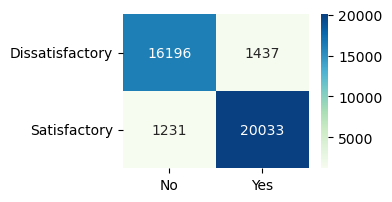

Senstivity: 20049.27
Specificity: 1438.00
Precision: 20046.94
F1: 60140.82


In [49]:
from sklearn.metrics import confusion_matrix

test_pred = dtc.predict(X_test_con)

cm = confusion_matrix(y_test, test_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(3,2))
res = pd.DataFrame(cm, columns=['No', 'Yes'], index=['Dissatisfactory', 'Satisfactory'])
sns.heatmap(res, annot=True, fmt='.0f', cmap='GnBu')
plt.show()

print('Senstivity: {:.2f}'.format(tp/fn+tp))
print('Specificity: {:.2f}'.format(tn/tn+fp))
print('Precision: {:.2f}'.format(tp/fp+tp))
print('F1: {:.2f}'.format(2*((tp/fn+tp)*(tp/fp+tp))/(tp/fn+tp)+(tp/fp+tp)))

In [50]:
feature_imp = dtc.feature_importances_
high_to_low = np.argsort(feature_imp)[::-1]
feature_names = X_train_con.columns[high_to_low]

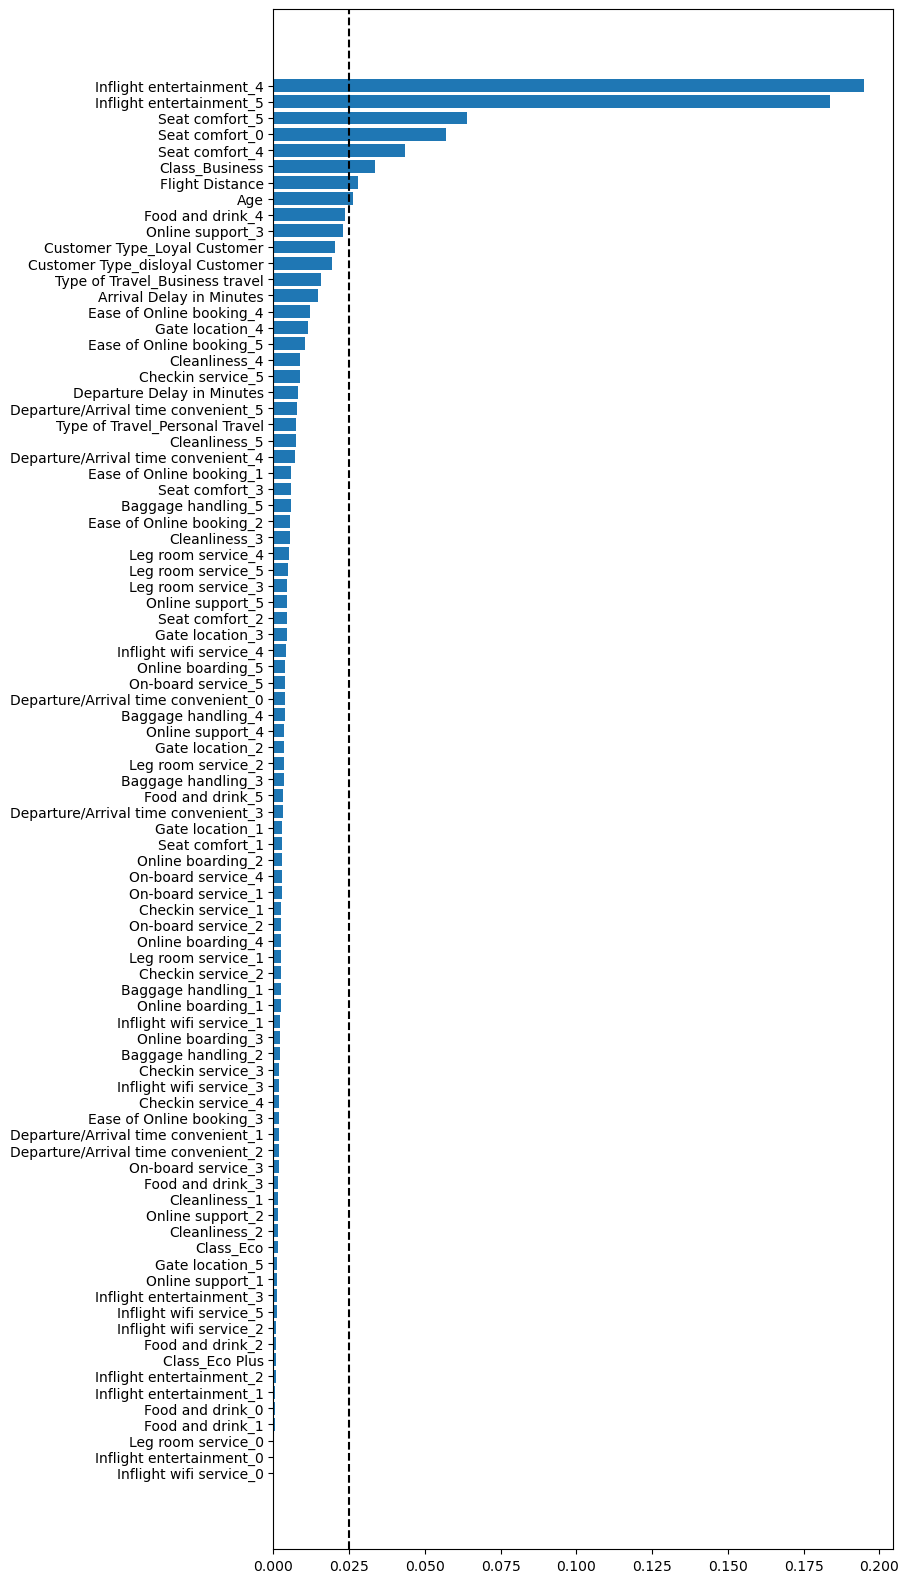

In [51]:
plt.figure(figsize=(8,20))
plt.barh(feature_names, feature_imp[high_to_low], align='center')
plt.axvline(x=0.025, color='k', linestyle='--')
plt.gca().invert_yaxis();

In [52]:
threshold = 0.025
features = feature_names[feature_imp[high_to_low] >= threshold]
features

Index(['Inflight entertainment_4', 'Inflight entertainment_5',
       'Seat comfort_5', 'Seat comfort_0', 'Seat comfort_4', 'Class_Business',
       'Flight Distance', 'Age'],
      dtype='object')

In [53]:
X_train_f = X_train_con[features]

In [54]:
path = dtc.cost_complexity_pruning_path(X_train_f, y_train, sample_weight=y_train.map(class_weights))

In [55]:
ccp_alphas = path.ccp_alphas[:-1]
ccp_alphas

array([ 0.00000000e+00, -6.77626358e-21,  0.00000000e+00, ...,
        5.95586487e-03,  1.87139125e-02,  2.60608368e-02])

In [56]:
ccp_alphas = np.clip(ccp_alphas, a_min=0.0, a_max=None)

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    'ccp_alpha' : [alpha for alpha in ccp_alphas],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [45, 90, 135],
    'max_depth' : [4, 5, 6, 7]
    
}

scoring = ['precision_weighted', 'f1_weighted', 'roc_auc_ovo']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=33)
dtc2 = RandomizedSearchCV(DecisionTreeClassifier(class_weight=class_weights, random_state=333), params, cv=cv, 
                          refit='f1_weighted', n_iter=30, scoring=scoring, random_state=333)

subset_indices = np.random.choice(len(X_train_f), size= int(0.1*len(X_train_f)), replace=False)
X_train_sub = X_train_f.iloc[subset_indices]
y_train_sub = y_train.iloc[subset_indices]

dtc2.fit(X_train_sub, y_train_sub)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight={0: 1866916868.5,
                                                                  1: 2251499656.0},
                                                    random_state=333),
                   n_iter=30,
                   param_distributions={'ccp_alpha': [0.0, 0.0, 0.0, 0.0,
                                                      3.3881317890172014e-21,
                                                      8.818746794052558e-21,
                                                      8.818746794052558e-21,
                                                      8.818746794052558e-21,
                                                      8.818746794052558e-21,
                                                      8.8...
                                                      1.2826279029136694e-20,
                                                      1.2826279029136694e-20,
                                                      1.2826279029136694e-20,
                                                      1.2826279029136694e-20,
                                                      1.2826279029136694e-20,
                                                      1.2826279029136694e-20, ...],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [45, 90, 135]},
                   random_state=333, refit='f1_weighted',
                   scoring=['precision_weighted', 'f1_weighted', 'roc_auc_ovo'])

In [58]:
best_model = dtc2.best_estimator_

In [59]:
dtc2.best_params_

{'min_samples_split': 90,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy',
 'ccp_alpha': 1.6536479080583587e-05}

In [61]:
dtc2.best_score_

0.8441891370429522

In [62]:
X_test_f = X_test_con[features]

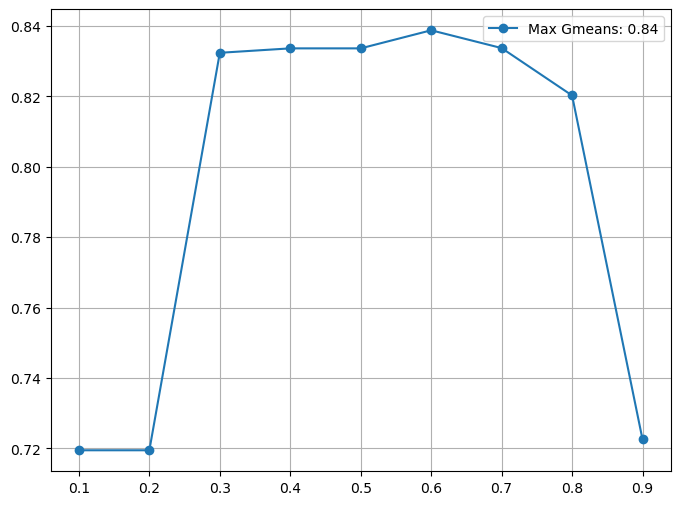

In [64]:
from sklearn.metrics import roc_curve

test_proba = best_model.predict_proba(X_test_f)[:, 1]

gmeans_score = []
numbers = [float(i)/10 for i in range(1, 10)]

for i in numbers:
    y_pred = [1 if prob >= i else 0 for prob in test_proba]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1 - fpr))
    max_gmeans = max(gmeans)
    gmeans_score.append(max_gmeans)

plt.figure(figsize=(8, 6))
plt.plot(numbers, gmeans_score, marker='o', label=f'Max Gmeans: {max(gmeans_score):.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
y_pred = [1 if prob >= 0.6 else 0 for prob in test_proba]

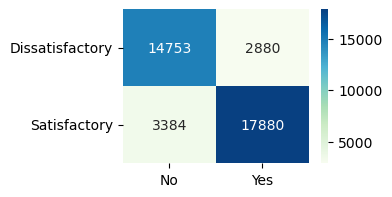

Senstivity: 17885.28
Specificity: 2881.00
Precision: 17886.21
Accuracy: 42025.00
F1: 53658.62


In [66]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(3,2))
res = pd.DataFrame(cm, columns=['No', 'Yes'], index=['Dissatisfactory', 'Satisfactory'])
sns.heatmap(res, annot=True, fmt='.0f', cmap='GnBu')
plt.show()

print('Senstivity: {:.2f}'.format(tp/fn+tp))
print('Specificity: {:.2f}'.format(tn/tn+fp))
print('Precision: {:.2f}'.format(tp/fp+tp))
print('Accuracy: {:.2f}'.format(tp+tn/tn+fn+fp+tp))
print('F1: {:.2f}'.format(2*((tp/fn+tp)*(tp/fp+tp))/(tp/fn+tp)+(tp/fp+tp)))